In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Numpy and Pands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processed

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Keras Moduels

In [3]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import LSTM, Dropout

# Importing Dataset

In [5]:
tesla =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/LSTM(RNN)/Tesla DataSet 5 years.csv" )
tesla

Date        Open        High         Low       Close   Adj Close  \
0     2019-02-28   21.261333   21.333332   20.720667   21.325333   21.325333   
1     2019-03-01   20.462667   20.475332   19.459999   19.652666   19.652666   
2     2019-03-04   19.874666   19.933332   18.851999   19.024000   19.024000   
3     2019-03-05   18.799999   18.933332   18.006666   18.436001   18.436001   
4     2019-03-06   18.431999   18.767332   18.292667   18.416000   18.416000   
...          ...         ...         ...         ...         ...         ...   
1254  2024-02-22  194.000000  198.320007  191.360001  197.410004  197.410004   
1255  2024-02-23  195.309998  197.570007  191.500000  191.970001  191.970001   
1256  2024-02-26  192.289993  201.779999  192.000000  199.399994  199.399994   
1257  2024-02-27  204.039993  205.600006  198.259995  199.729996  199.729996   
1258  2024-02-28  200.419998  205.300003  198.440002  202.039993  202.039993   

         Volume  
0     157810500  
1     343671000  
2     256452000  
3     281470500  
4     155032500  
...         ...  
1254   92739500  
1255   78841900  
1256  111747100  
1257  108645400  
1258   99806200  

[1259 rows x 7 columns]

# Data Splitting

In [6]:
training = tesla.iloc[:800,1:2].values
testing = tesla.iloc[800:,1:2].values

# Data Normaliztion

In [7]:
nm_scale = MinMaxScaler(feature_range=(0,1))
training_scale = nm_scale.fit_transform(training)

In [8]:
nm_scale

MinMaxScaler()

# Data Sctructure With 60 time steps and 1 Output

In [13]:
x_train = []
y_train = []
for i in range(60,800):
  x_train.append(training_scale[i-60:i,0])
  y_train.append(training_scale[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Model Architecture

In [19]:
model = Sequential()

In [21]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model

In [23]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
model.fit(x_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.1186
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0082
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0060
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0056
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0065
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0068
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0055
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0056
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0055
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0046
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0051
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0050
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0049
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0058
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step

# Preparing Test Data

In [25]:
train_data = tesla.iloc[:800, 1:2]
test_data = tesla.iloc[800:, 1:2]
total_data = pd.concat((train_data, test_data), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = nm_scale.transform(inputs)

In [28]:
stock_price_predicted = model.predict(x_train)
stock_price_predicted = nm_scale.inverse_transform(stock_price_predicted)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


ValueError: x and y must have same first dimension, but have shapes (459,) and (740, 1)

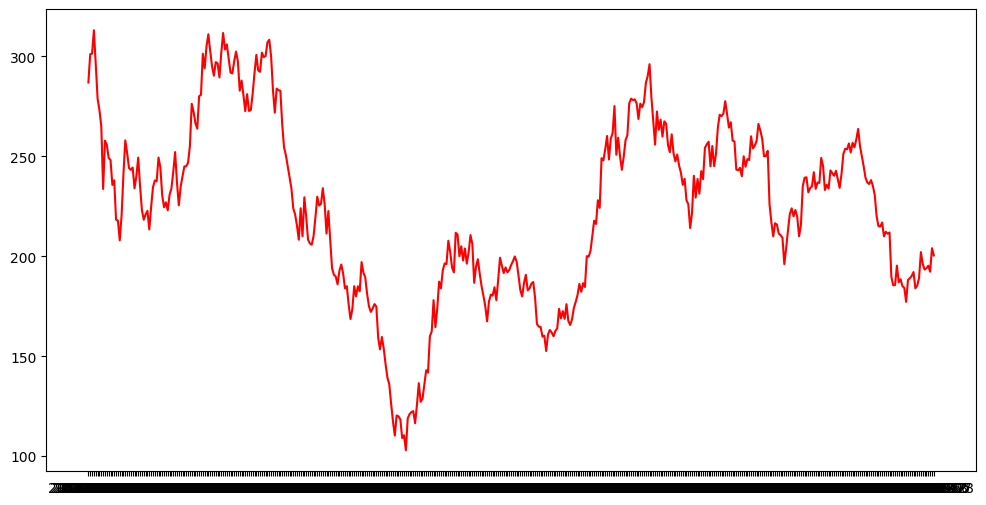

In [34]:
plt.figure(figsize=(12,6))
plt.plot(tesla.loc[800:, "Date"],test_data, color="red", label="  ActualTesla Stock Price") # Changed "Data" to "Date"
plt.plot(tesla.loc[800:, "Date"],stock_price_predicted, color="green", label="Predicted Tesla Stock Price") # Changed "Data" to "Date"
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


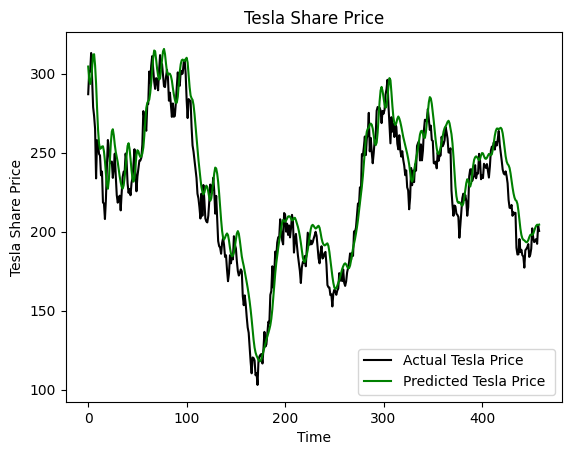

In [27]:
# Make Predictions on Test Data
prediction_days = 60  # Define prediction_days, you might need to adjust this value
company = "Tesla"  # Define the company name
# Assuming 'inputs' from previous cell is your model_inputs
model_inputs = inputs
# You need to define actual_prices and scaler based on your data and preprocessing steps
# Here's a placeholder assuming you have a scaler called 'nm_scale'
scaler = nm_scale
# Assuming 'testing' from your data splitting step is your actual prices
actual_prices = testing

x_test = []

for x in range (prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot The Test Predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price ")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()


In [ ]:
# Make Predictions on Test Data
x_test = []

for x in range (prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot The Test Predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price ")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
Open
Tesla Stock Opening Price for the given date.


High
Tesla Stock price highest price point hit


Low
Tesla Stock price lowest price for the given date


Close
Tesla Stock price lowest price for the given date


Adj Close
Adjusted stock closing price of Tesla after taking dividends, stock splits, and new stock offerings into account.


Volume
Amount of an Tesla Stock that changed hands over the course of the trading day.